# Project 5 | Ford GoBike System Data Exploration
## by Fatimah Almohammedsaleh

> In this document, I will go through the steps of exploring Ford GoBike System dataset which contains information about individual rides made in their bike-sharing system covering the greater San Francisco Bay area in 2018.

## Preliminary Wrangling


In [3]:
# import the required packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import calendar

%matplotlib inline

## 1. Gathering Data

In [4]:
# read the first csv file
df = pd.read_csv('datasets_2018/201801-fordgobike-tripdata.csv')

In [5]:
# number of csv files
n_files = 12

# read the rest of the csv files and append them to the dataframe
for i in range(2 , n_files+1):
    if i < 10:
        file_name = "datasets_2018/20180{}-fordgobike-tripdata.csv".format(i)
    else :
        file_name = "datasets_2018/2018{}-fordgobike-tripdata.csv".format(i)
    new_df = pd.read_csv(file_name)
    df = df.append(new_df , ignore_index=True)

## 2. Assessing Data

In [6]:
# display the dataframe from visual assessment
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863716,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,No
1863717,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,No
1863718,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,No
1863719,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,No


In [7]:
# get the dataset's dimensions
df.shape

(1863721, 14)

In [8]:
# check the dataframe for incorrect datatypes and ambiguous column names 
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object

In [9]:
# check the exsitence of missing values
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [10]:
# check the exsitence of duplicated records
sum(df.duplicated())

0

In [12]:
# get the counts of the unique values in user_type column
df['user_type'].value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [13]:
# get the counts of the unique values in bike_share_for_all_trip column
df['bike_share_for_all_trip'].value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

In [14]:
# check if the number of null values in one of the stations information columns matches the number of nulls in all four columns
# this should be true
df['start_station_id'].isna().sum() == df[(df['start_station_id'].isna()) & (df['start_station_name'].isna()) & \
                                      (df['end_station_id'].isna()) & (df['end_station_name'].isna())].shape[0]

True

In [15]:
# get the proportion of nulls in stations information columns with repsect to the total number of columns
print("{:.2f} %".format((df['start_station_id'].isnull().sum() / df.shape[0]) * 100 ))

0.63 %


In [17]:
# suppress scientific notation in the numeric columns in the dataframe to show all of the decimals
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# display descriptive statistics for the numeric columns
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1863721.00000,1851950.00000,1863721.00000,1863721.00000,1851950.00000,1863721.00000,1863721.00000,1863721.00000
mean,857.30257,119.67444,37.76678,-122.34918,118.17298,37.76690,-122.34866,2296.85054
std,2370.37886,100.39756,0.10577,0.16546,100.44025,0.10565,0.16506,1287.73252
min,61.00000,3.00000,37.26331,-122.47366,3.00000,37.26331,-122.47366,11.00000
25%,350.00000,33.00000,37.77106,-122.41140,30.00000,37.77106,-122.40945,1225.00000
50%,556.00000,89.00000,37.78107,-122.39738,88.00000,37.78127,-122.39709,2338.00000
75%,872.00000,186.00000,37.79625,-122.28653,183.00000,37.79728,-122.28937,3333.00000
max,86366.00000,381.00000,45.51000,-73.57000,381.00000,45.51000,-73.57000,6234.00000


### Quality Issues:

1. Missing values (start_station_id , start_station_name , end_station_id , end_station_name).
2. Uneeded columns (start_station_latitude , start_station_longitude , end_station_latitude, end_station_longitude).
3. Erroneous datatypes (start_time , end_time, user_type, bike_share_for_all_trip , bike_id ,start_station_id , end_station_id).
4. Trips duration should be in minutes instead of seconds.

### Tidiness Issues:

Multiple varibales in two variable(start_time , end_time)

## 3. Cleaning Data

The first thing to do before starting cleaning is making a copy of each piece of data, in which all the cleaning operations will be conducted on the copies. 

In [18]:
# making copies of the gathered datarame
df_clean = df.copy()

### 3.1 Addressing Missing Data

#### 3.1.1. Missing values in the columns (start_station_id , start_station_name , end_station_id , end_station_name)
Since the number of records with missing values in the mentioned columns represent less than 1 percent (0.63%) of the total number of reports, it is better to drop these records.

#### Define

Drop the records with null values.

#### Code

In [19]:
# drop the records with null values
df_clean.dropna(inplace = True)

#### Test

In [20]:
# confirm that the records with null values are gon
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

### 3.2 Cleaning up Quality Issues

#### 3.2.1 Uneeded columns 
(start_station_latitude , start_station_longitude , end_station_latitude, end_station_longitude)

#### Define

Drop start_station_latitude , start_station_longitude , end_station_latitude, end_station_longitud columns.

#### Code

In [21]:
# drop unneeded columns
df_clean.drop(['start_station_latitude' , 'start_station_longitude' , 'end_station_latitude' , 'end_station_longitude']\
                      , axis = 1 , inplace = True)

#### Test

In [22]:
# confirm that the specified columns are gone
list(df_clean)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'bike_id',
 'user_type',
 'bike_share_for_all_trip']

#### 3.2.2.Erroneous datatypes 
(start_time , end_time, user_type, bike_share_for_all_trip , bike_id ,start_station_id , end_station_id)


#### Define

Convert:
- bike_id , start_station_id , end_station_id to string since it they are not intended to perform calculations.
- user_type to categorical data type.
- start_time and end_time to date data type. 
- bike_share_for_all_trip to boolean data type.

#### Code

In [23]:
# convert to string
df_clean['bike_id'] = df_clean['bike_id'].astype(str)
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)

# convert to category
df_clean['user_type'] = df_clean['user_type'].astype('category')

# convert to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# convert to boolean
df_clean['bike_share_for_all_trip'].replace({'Yes': True , 'No': False} , inplace = True)
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype(bool)

#### Test

In [24]:
# check the columns data types
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                        category
bike_share_for_all_trip              bool
dtype: object

#### 3.2.2. Trips duration should be in minutes instead of seconds


#### Define

Devide the values in duration_sec column by 60.

#### Code

In [25]:
# devide the values in duration_sec column by 60
df_clean['duration_sec'] = df_clean['duration_sec'] / 60

In [26]:
df_clean.rename({'duration_sec' : 'duration_min'} , axis = 1 , inplace = True)

#### Test

In [28]:
# check the descriptive analysis of duration_sec column
df_clean['duration_min'].describe()

count   1851950.00000
mean         14.21666
std          38.99084
min           1.01667
25%           5.83333
50%           9.25000
75%          14.50000
max        1439.43333
Name: duration_min, dtype: float64

## 2. Re-assessing Data

In [29]:
# get a sample of 10 records from the cleaned dataframe
df_clean.sample(10)

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip
593876,12.71667,2018-05-05 19:39:59.471,2018-05-05 19:52:42.882,324.0,Union Square (Powell St at Post St),28.0,The Embarcadero at Bryant St,3818,Subscriber,False
1011578,3.10000,2018-07-02 16:06:08.930,2018-07-02 16:09:14.989,242.0,Milvia St at Derby St,274.0,Oregon St at Adeline St,3423,Subscriber,False
862095,6.51667,2018-07-25 09:56:01.044,2018-07-25 10:02:32.738,259.0,Addison St at Fourth St,265.0,Ninth St at Parker St,3422,Subscriber,False
573415,23.10000,2018-05-09 15:52:10.880,2018-05-09 16:15:17.668,252.0,Channing Way at Shattuck Ave,259.0,Addison St at Fourth St,228,Subscriber,True
1067821,6.95000,2018-08-23 18:18:52.773,2018-08-23 18:25:49.775,19.0,Post St at Kearny St,26.0,1st St at Folsom St,2811,Subscriber,False
1596952,12.15000,2018-10-01 08:26:03.903,2018-10-01 08:38:12.933,138.0,Jersey St at Church St,76.0,McCoppin St at Valencia St,2907,Customer,False
51171,5.48333,2018-01-17 09:45:19.518,2018-01-17 09:50:49.515,126.0,Esprit Park,114.0,Rhode Island St at 17th St,1513,Subscriber,False
596681,6.90000,2018-05-05 09:05:33.653,2018-05-05 09:12:27.678,324.0,Union Square (Powell St at Post St),58.0,Market St at 10th St,3838,Subscriber,False
1350519,36.23333,2018-09-09 15:41:19.696,2018-09-09 16:17:34.425,58.0,Market St at 10th St,363.0,Salesforce Transit Center (Natoma St at 2nd St),4410,Customer,False
876404,26.05000,2018-07-23 15:06:02.286,2018-07-23 15:32:06.251,6.0,The Embarcadero at Sansome St,5.0,Powell St BART Station (Market St at 5th St),1107,Customer,False


In [30]:
# get the cleaned dataframe's dimensions
df_clean.shape

(1851950, 10)

In [31]:
# display descriptive statistics for the numeric columns
df_clean.describe()

,duration_min
count,1851950.00000
mean,14.21666
std,38.99084
min,1.01667
25%,5.83333
50%,9.25000
75%,14.50000
max,1439.43333


In [32]:
# get the counts of the unique values in user_type column
df_clean['user_type'].value_counts()

Subscriber    1574991
Customer       276959
Name: user_type, dtype: int64

In [33]:
# get the counts of the unique values in bike_share_for_all_trip column
df_clean['bike_share_for_all_trip'].value_counts()

False    1690457
True      161493
Name: bike_share_for_all_trip, dtype: int64

### What is the structure of your dataset?

The dataset consists of 1851950 bike trips in which each record has the following features (after cleaning):

    - Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
    - Start Station ID
    - Start Station Name
    - End Station ID
    - End Station Name
    - Bike ID
    - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    - Bike Share for All Trip (this is a boolean column which indiacte if the trip is part of Bike Share for All option which is affordable, accessible transportation option)
    
There is only one numerical column left in the dataset after cleaning which is trip duration, one categorical (nominal) column which is User Type, and one boolean column which is Bike Share for All Trip. As for starting and ending time and date, both are of the date data type, while the rest of the columns are strings. 

### What is/are the main feature(s) of interest in your dataset?

I'm mostly interested in figuring out the affect of different time periods (weekdays, time of the day , month of the year ...) on the number of bike trips and their durations, and the association between these numbers with the users type. 

Also, I would like to find out the contribution of intruducing Bike Share for All option in affecting the trips duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Most of the remaining features will be helpful for the invistgation except the once realted to the stations ( Start Station ID, Start Station Name ,End Station ID ,End Station Name), in addition to the need of extracting new features from start/end time & date columns (month, weekday, hour , time of the day, day type(weekend or weekday) ). 

## Feature Engineering

In order to get usfull insight from the trips dates and times, I will have to extract information from start_time column to create sepereate columns for each time unit.  

In [34]:
# create new columns by extracting information from start_time
df_clean['start_month'] = pd.DatetimeIndex(df_clean['start_time']).month
df_clean['start_week_day'] = df_clean['start_time'].dt.weekday
df_clean['start_hour'] = df_clean['start_time'].dt.hour
df_clean['start_time_of_day'] = np.where(df_clean['start_hour'] > 12 , 'Evening', 'Morning')
df_clean['start_day_type'] = np.where(df_clean['start_week_day'] > 4 , 'Weekend', 'Weekday')

df_clean.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip,start_month,start_week_day,start_hour,start_time_of_day,start_day_type
0,1254.73333,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,2765,Subscriber,False,1,2,22,Evening,Weekday
1,1423.70000,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,False,1,2,16,Evening,Weekday
2,1192.93333,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,296.0,5th St at Virginia St,3039,Customer,False,1,2,14,Evening,Weekday
3,1017.93333,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,47.0,4th St at Harrison St,321,Customer,False,1,2,14,Evening,Weekday
4,666.10000,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,19.0,Post St at Kearny St,617,Subscriber,False,1,2,19,Evening,Weekday


In [294]:
# convert to category
df_clean['start_time_of_day'] = df_clean['start_time_of_day'].astype('category')
df_clean['start_day_type'] = df_clean['start_day_type'].astype('category')
df_clean['start_month'] = df_clean['start_month'].astype('category')
df_clean['start_week_day'] = df_clean['start_week_day'].astype('category')

In [35]:
# check the columns data types
df_clean.dtypes

duration_min                      float64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                        category
bike_share_for_all_trip              bool
start_month                         int64
start_week_day                      int64
start_hour                          int64
start_time_of_day                  object
start_day_type                     object
dtype: object

## Storing Data

In [60]:
# store the the final verions of the dataset in a CSV file
df_clean.to_csv('fordgobike_2018_clean.csv', header=True, index = False)

## 1. Univariate Exploration

Now I will investigate the distribution of individual variables of interest.

In [36]:
# set the base color that will be used in all plots
base_color = sb.color_palette()[0]

### 1.1 Trip Duration 

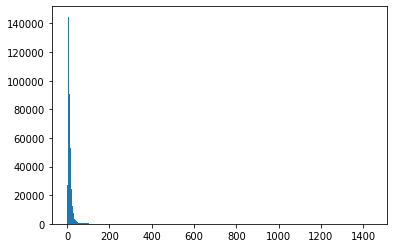

In [350]:
bin_edges = np.arange(0, df_clean['duration_min'].max()+1, 1)
plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges);

Based on the above plot, the distribution of trips duration is clear and this colud be due to the existance of outliers or a very small number of values in the range 200 and 1400 minuts. To solve this, I need to increase the figure size and change the limit of the x axis to take a closer look at the underlying patterns in the data.

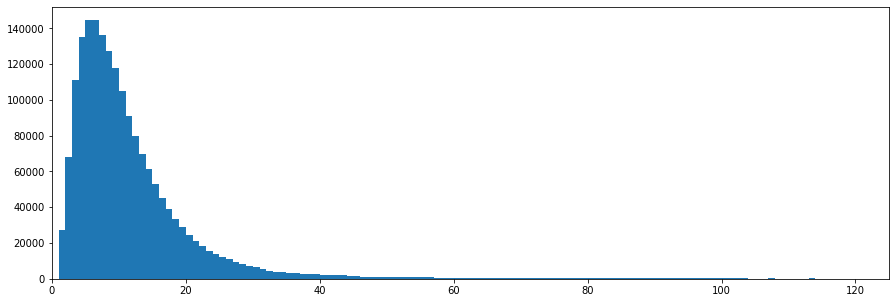

In [329]:
plt.figure(figsize = [15, 5])

bin_edges = np.arange(0, df_clean['duration_min'].max()+1, 1)
plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges)
plt.xlim(0 , 125);

We can see that the data looks highly skewed in which there is a lot of data points with low values, anda very long tail of data points with large values almost representing 75% of the x axis. So, I will apply a logarithmic transform to this data.

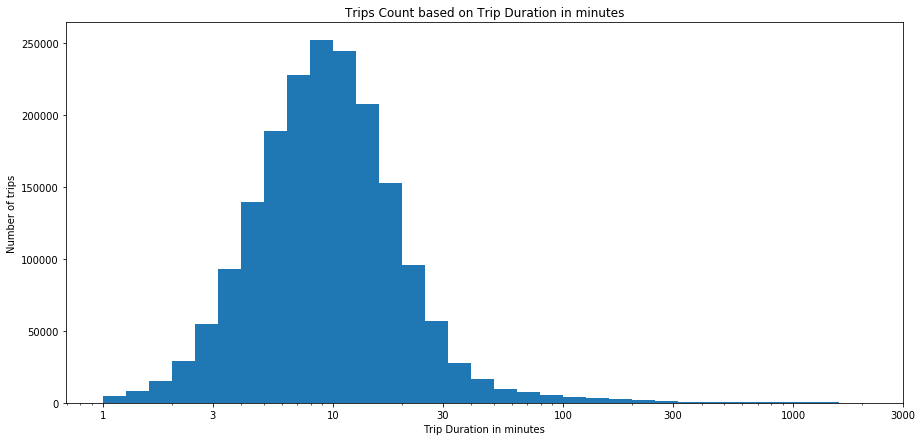

In [352]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[15, 7])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xscale('log')

ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(ticks , ticks)
plt.xlabel('Trip Duration in minutes')
plt.ylabel('Number of trips')
plt.title('Trips Count based on Trip Duration in minutes');

The logarithmic transform made the large points of trips duration look in line with the rest. So now, trips duration appears to be normally distributed with one peak at 8 to 10 minutes. Also, this histogram shows that the majority of trips had duration of 30 minutes or less while only small number of trips took more than that.

### 1.2 Trip Start Month

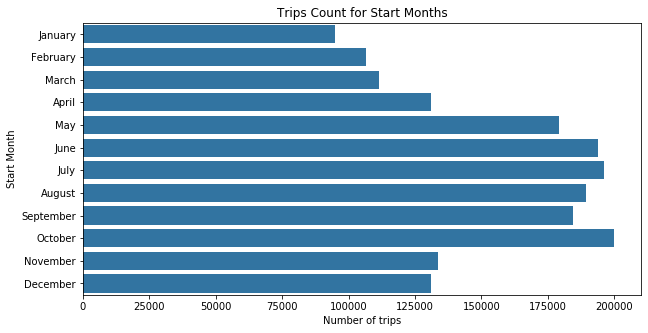

In [48]:
plt.figure(figsize = [10, 5])

sb.countplot(data = df_clean, y = 'start_month', color = base_color)
plt.yticks(np.arange(12) , calendar.month_name[1:13])
plt.ylabel('Start Month')
plt.xlabel('Number of trips')
plt.title('Trips Count for Start Months');

From the bar chart, we can see that the six months period from **May** to **October** had the highest number of bike trips in general, with **October** being the highest month with about 200,000 trips followed by **July** then **June**. To be more specific, the number of trips started at its lowest count at the beginning of year (in **January**) with less than 100,000 trips, and it continued to increase month by month until it reached its highest count in **October**, then it witnessed a significant drop (by almost 75,000) by the end of the year in **November**.  

### 1.3 Start Weekday

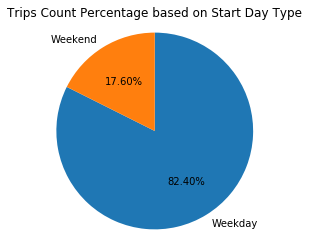

In [50]:
v_counts = df_clean['start_day_type'].value_counts()
plt.pie(v_counts, labels = v_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%')
plt.axis('square')
plt.title('Trips Count Percentage based on Start Day Type');

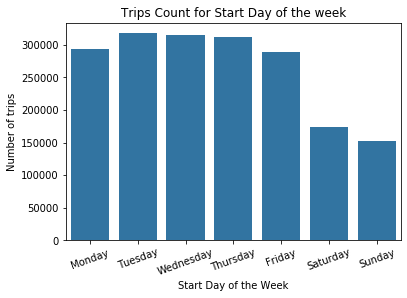

In [45]:
sb.countplot(data = df_clean, x = 'start_week_day', color = base_color)
plt.xticks(np.arange(7) , calendar.day_name[0:8] , rotation = 20)
plt.xlabel('Start Day of the Week')
plt.ylabel('Number of trips')
plt.title('Trips Count for Start Day of the week');

It is clear from the figures that weekdays have a greater total number of bike trips than the weekend with a percentage of 82.4%. And among the weekdays, Tuesdays are happen to have the highest number of trips compared to the other days, which is about 300,000 trips in total. 

### 1.4 Start Time of the Day/Hour

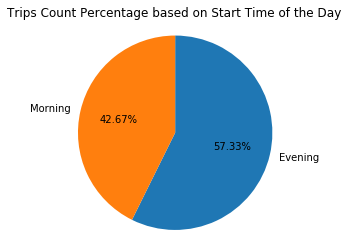

In [51]:
v_counts = df_clean['start_time_of_day'].value_counts()
plt.pie(v_counts, labels = v_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%')
plt.axis('square')
plt.title('Trips Count Percentage based on Start Time of the Day');

In [58]:
# get the value counts for start hour
start_vcount = df_clean['start_hour'].value_counts()

# get the maximum and minimum value counts
start_vcount.values.min() , start_vcount.values.max()

(2105, 218862)

In [59]:
# get a suitable y range for the plot based on the maximum and minimum value counts
yticks_range = np.arange(2000, 240000, 20000)
yticks_range

array([  2000,  22000,  42000,  62000,  82000, 102000, 122000, 142000,
       162000, 182000, 202000, 222000])

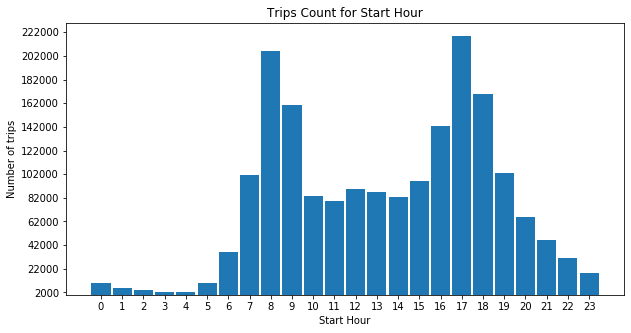

In [61]:
plt.figure(figsize = [10, 5])

bin_edges = np.arange(-0.5, 23 + 1.5 , 1)
plt.hist(df_clean['start_hour'], bins = bin_edges,  rwidth = 0.9)
plt.xticks(np.arange(0 , 23 + 1, 1))
plt.yticks(yticks_range)
plt.xlabel('Start Hour')
plt.ylabel('Number of trips')
plt.title('Trips Count for Start Hour');

In general, the majority of trips were taken in the evenings as the pie chart shows that the percentage of these evenings trips is 57.33% of the total number of trips. And from the histogram, it appears that the highest number of bike trips had usually started at 5:00 PM followed by 8:00 AM, while the hours with the least number of trips are the early morning hours (12:00 AM to 5:00 AM).

### 1.5 User Type

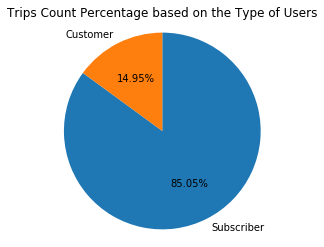

In [309]:
v_counts = df_clean['user_type'].value_counts()
plt.pie(v_counts, labels = v_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%')
plt.axis('square')
plt.title('Trips Count Percentage based on the Type of Users');

The pie chart shows that trips taken by subscribers represents approximatly 85% of the total number of trips which exceeds the percentage of customer trips by almost 70%.  

### 1.6 Bike Share for All Trips

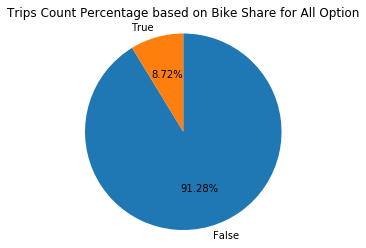

In [319]:
v_counts = df_clean['bike_share_for_all_trip'].value_counts()
plt.pie(v_counts, labels = v_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%')
plt.axis('square')
plt.title('Trips Count Percentage based on Bike Share for All Option');

It appears that only 8.72% of the total number of trpis were by users who were part of "Bike Share for All" trip option.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

### 1. Variables of Interest Distribution:

**Trips duration distribution:**
- Trips duration are normally distributed with one peak at 8 to 10 minutes, Also, and the majority of trips had duration of 30 minutes or less.

**Trips starting date and time distribution:** 
- In general, the time period from May to October witnessed the highest number of trips.
- October is the highest month with total number of trips of about 200,000 trips, followed by July then June. 
- Weekdays have a percentage of 82.4% of the total given that Tuesdays have the highest number of trips, which is about 300,000 trips in total. 
- 57.33% of the trips were taken in the evenings and the highest number of bike trips had usually started at 5:00 PM followed by 8:00 AM. The hours with the least number of trips are between (12:00 AM to 5:00 AM).

**User type distribution:**
- Approximatly, 85% of the total number of trips were taken by subscribers and that exceeds the percentage of customer trips by almost 70%.  

**Bike Share for All Trips distribution:**
- 8.72% of the total number of trpis were by users who were part of "Bike Share for All" trip option.

### 2. Existance of unusual points:

Trips duration distribution were highly skewed in which there was a lot of data points with low values, anda very long tail of data points with large values almost representing 75% of the x axis. So, I had to apply a logarithmic transform to this data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

No unusual distributions were identified in the investigated features.

Some changes on the original datased were performed on which feature engineering was applied for extracting new columns from start_time column. 

## 2. Bivariate Exploration

Here I will start investigating relationships between pairs of variables which have been introduced in the previous section.

### 2.1 Relationship between trips duartion and the rest of variables

#### 2.1.1 Duration vs. Start Hour

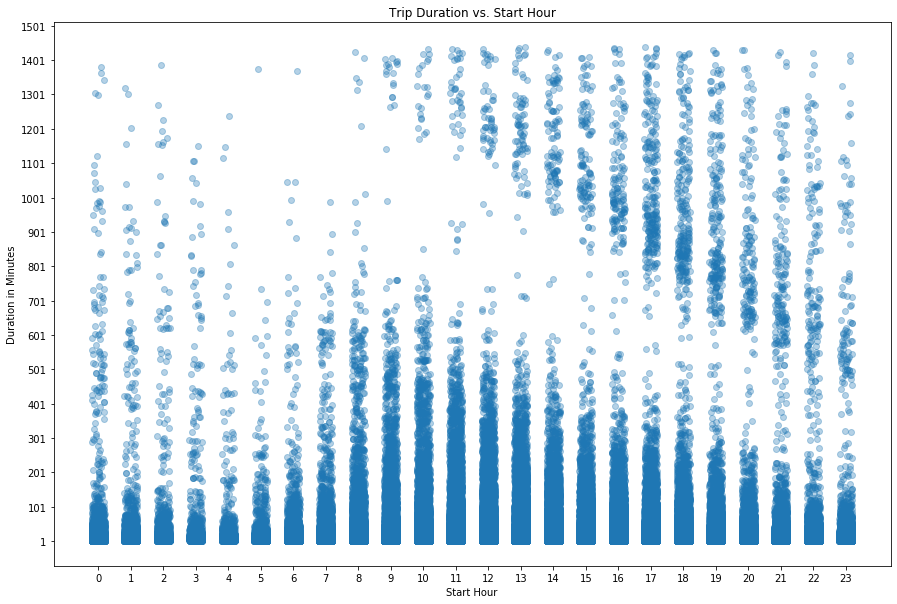

In [62]:
plt.figure(figsize = [15, 10])
sb.regplot(data = df_clean, x = 'start_hour', y = 'duration_min', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.xticks(np.arange(0 , 23 + 1, 1))
plt.yticks(np.arange(df_clean['duration_min'].min() , df_clean['duration_min'].max() + 100, 100))
plt.ylabel('Duration in Minutes')
plt.xlabel('Start Hour')
plt.title('Trip Duration vs. Start Hour');

It is obvious that bike trips that start after 8 AM are more likly to have longer duration.

#### 2.1.2 Duration vs. Sart Month

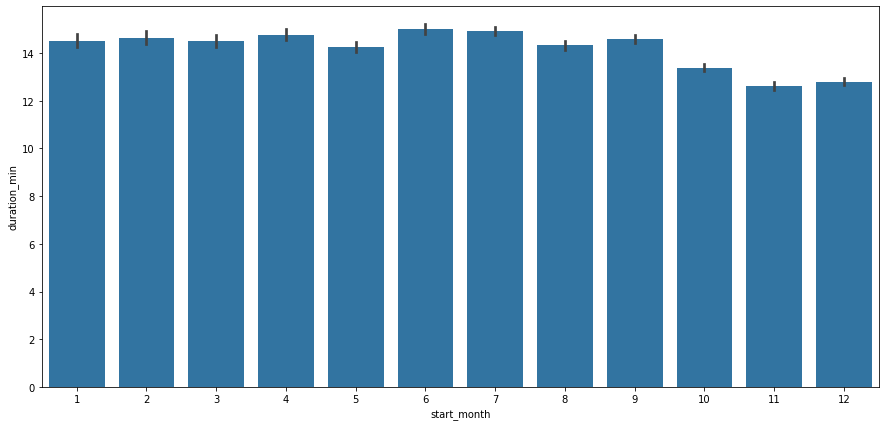

In [65]:
plt.figure(figsize = [15, 7])
sb.barplot(data = df_clean, x = 'start_month', y = 'duration_min', color = base_color);

Since all months have average trip duration greater than 12 minutes, I will change the limit of the x axis to take a closer look at the underlying patterns in the data.

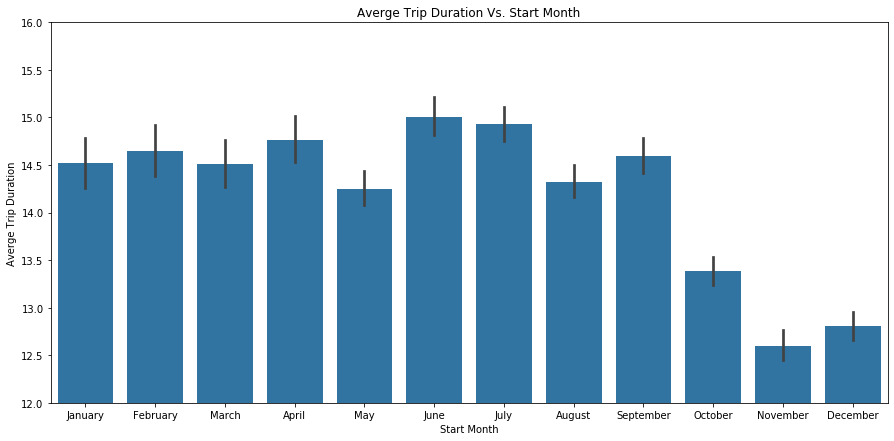

In [66]:
plt.figure(figsize = [15, 7])
sb.barplot(data = df_clean, x = 'start_month', y = 'duration_min', color = base_color)
plt.xlabel('Start Month')
plt.ylabel('Averge Trip Duration')
plt.xticks(np.arange(12) , calendar.month_name[1:13])
plt.ylim(12 , 16)
plt.title('Averge Trip Duration Vs. Start Month');

June and July respectivly have the two highest average trip durations, while Novermver had the lowest avererage duration.  

#### 2.1.3 Duration vs. Sart Weekday

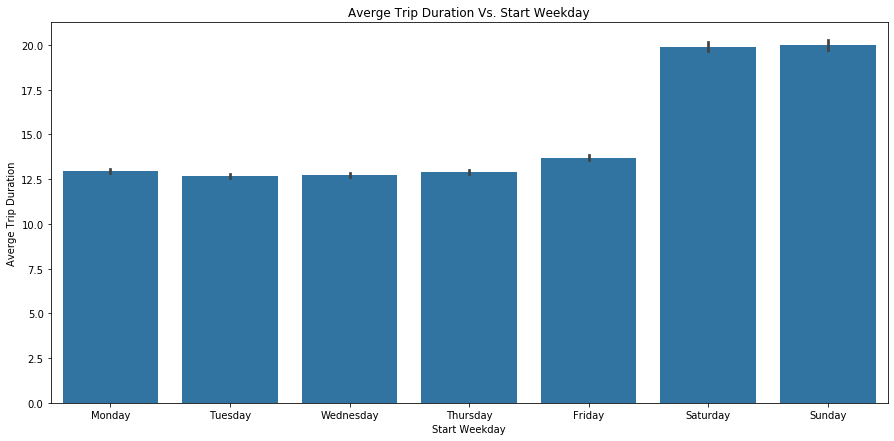

In [67]:
plt.figure(figsize = [15, 7])
sb.barplot(data = df_clean, x = 'start_week_day', y = 'duration_min', color = base_color)
plt.xlabel('Start Weekday')
plt.ylabel('Averge Trip Duration')
plt.xticks(np.arange(7) , calendar.day_name[0:7])
plt.title('Averge Trip Duration Vs. Start Weekday');

Weekndes seems to have the highest average trip durations compared to weekdays, and there are slight diference amonge avergae duration in the weekdays among themselfs but we can say they are almost equal.

#### 2.1.4 Duration vs. User Type & Bike Share for All Option Status

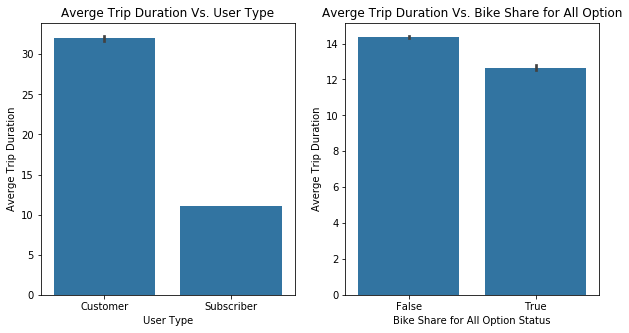

In [68]:
plt.figure(figsize = [10, 5])

plt.subplot(1,2,1)
sb.barplot(data = df_clean, x = 'user_type', y = 'duration_min', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Averge Trip Duration')
plt.title('Averge Trip Duration Vs. User Type')

plt.subplot(1,2,2)
sb.barplot(data = df_clean, x = 'bike_share_for_all_trip', y = 'duration_min', color = base_color)
plt.xlabel('Bike Share for All Option Status')
plt.ylabel('Averge Trip Duration')
plt.title('Averge Trip Duration Vs. Bike Share for All Option');

Trips taken bay customers have higher average durations than the ones taken by the subscribers, which makes us question the reasonse behind that. 

Andt he avergaes of the Share for all trips members and non-memebrs are close to each other, this colud be an indicator that intrudcing this option colud lead to increasing trips average duration in the long run. 

### 2.2 Relationship between user type and trip start time (Month , Weekday , Time of the day/Hour)

#### 2.2.1 User Type vs. Start Month

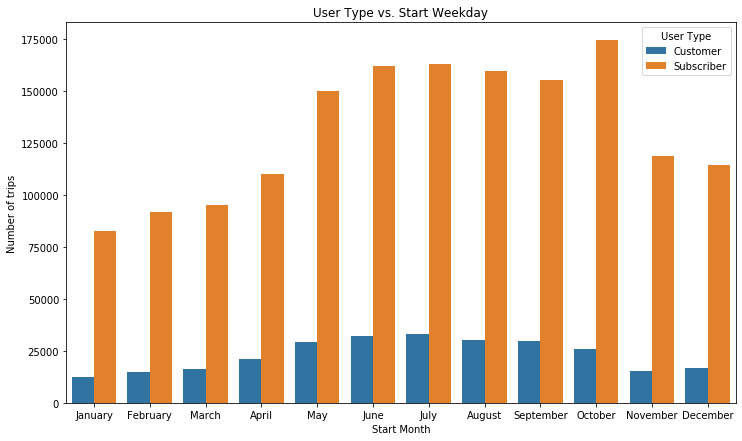

In [69]:
plt.figure(figsize = [12, 7])
ax = sb.countplot(data = df_clean, x = 'start_month', hue = 'user_type')
plt.xticks(np.arange(12) , calendar.month_name[1:13])
plt.xlabel('Start Month')
plt.ylabel('Number of trips')
plt.title('User Type vs. Start Weekday')
ax.legend(title = 'User Type');

The distibutions of the number of trips for both users type amonge the months are closley similar, exepct that the number of total sucbsribers has jumped to its highset count while the total of customers trips continued to decrease.

#### 2.2 User Type vs. Start Weekday

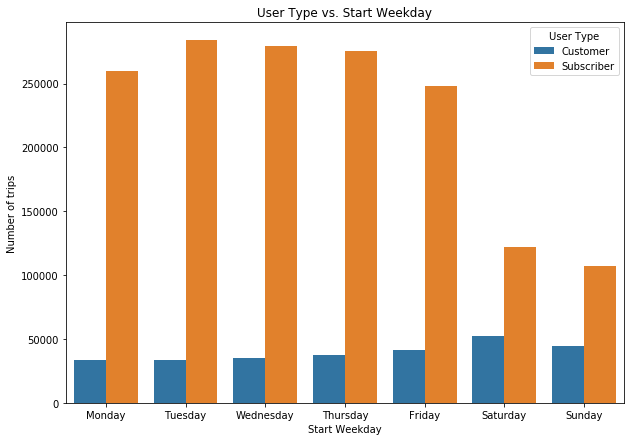

In [70]:
plt.figure(figsize = [10, 7])
ax = sb.countplot(data = df_clean, x = 'start_week_day', hue = 'user_type')
plt.xticks(np.arange(7) , calendar.day_name[0:8])
plt.xlabel('Start Weekday')
plt.ylabel('Number of trips')
plt.title('User Type vs. Start Weekday')
ax.legend(title = 'User Type');

The number of trips made by the subscribers has higher counts in the weekdays (Tuesday has the highest count) compared to the weekends, while the customers takes more bike trips in the weeknds.  

#### 2.3 User Type vs. Start Hour

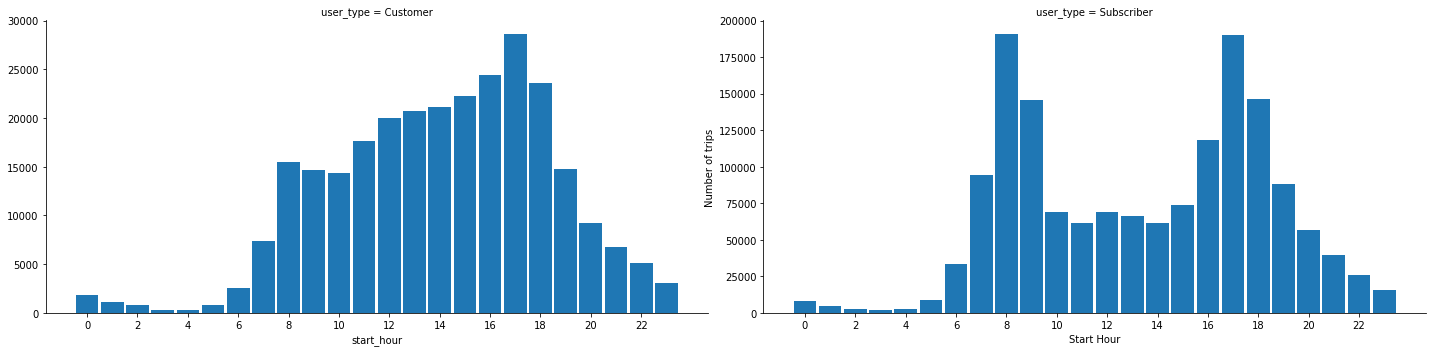

In [71]:
bin_edges = np.arange(-0.5, 23 + 1.5 , 1)

g = sb.FacetGrid(data = df_clean , col = 'user_type', sharey = False ,height = 5, aspect =2)
g.map(plt.hist, 'start_hour' , bins = bin_edges ,  rwidth = 0.9);

plt.ylabel('Number of trips')
plt.xticks(np.arange(0 , 23 + 1, 2))
plt.xlabel('Start Hour');

Customers tend to take relativly high number of bike rides in the time period form 8:00 AM to 5:00 PM in comparision to the rest of the day with 5:00 having the highst number of trips. As of the subscripers, the highest number of trips apperes only at 8:00 AM and 5:00 PM, and much lesser numbers in the period in between. 

### 2.3 Relationship between "Bike Share for All Option" and trip start time (Month , Weekday , Time of the day/Hour)

#### 2.3.1 Share for all vs. Start Month

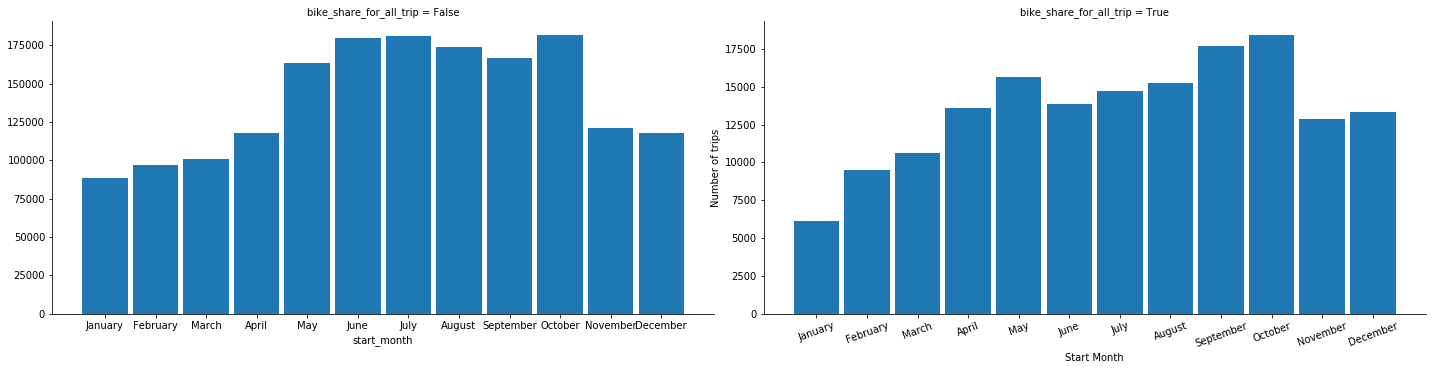

In [82]:
bin_edges = np.arange(0.5, 12 + 1.5 , 1)

g = sb.FacetGrid(data = df_clean , col = 'bike_share_for_all_trip', sharey = False ,height = 5, aspect =2)
g.map(plt.hist, 'start_month' , bins = bin_edges ,  rwidth = 0.9);

plt.xticks(np.arange(1 , 12 + 1, 1), calendar.month_name[1:13] , rotation = 20)
plt.xlabel('Start Month')
plt.ylabel('Number of trips');

Members of "bike share for all trips" tend to heve higher number of trips than non-members in Jun and July, other than that, the ditribution of the rest of the months seems almost similar.

#### 2.3.2 Share for all vs. Start Hour

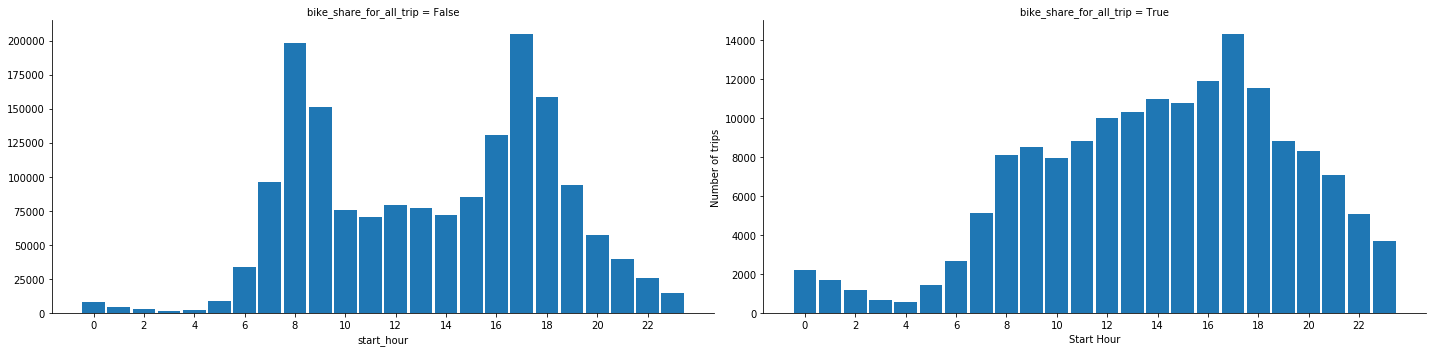

In [74]:
bin_edges = np.arange(-0.5, 23 + 1.5 , 1)

g = sb.FacetGrid(data = df_clean , col = 'bike_share_for_all_trip', sharey = False ,height = 5, aspect =2)
g.map(plt.hist, 'start_hour' , bins = bin_edges ,  rwidth = 0.9);

plt.xticks(np.arange(0 , 23 + 1, 2))
plt.xlabel('Start Hour')
plt.ylabel('Number of trips');

Members of "bike share for all trips" have the highest number of taked trips at 5:00 PM while non-member have the highest number in the time periods  8:00 AM and 5:00 PM.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

### Relationship between trips duartion and the rest of variables:

- Bike trips that start after 8 AM are more likly to have longer duration.
- June and July respectivly have the two highest average trip durations, while Novermver had the lowest avererage duration.  
- Weekndes seems to have the highest average trip durations compared to weekdays, and there are slight diference amonge avergae duration in the weekdays among themselfs
- Trips taken bay customers have higher average durations than the ones taken by the subscribers.
- The avergaes of the Share for all trips members and non-memebrs are close to each other. 

### Relationship between user type and trip start time (Month , Weekday , Time of the day/Hour):

- The distibutions of the number of trips for both users type amonge the months are closley similar, exepct that the number of total sucbsribers has jumped to its highset count while the total of customers trips continued to decrease.
- The number of trips made by the subscribers has higher counts in the weekdays (Tuesday has the highest count) compared to the weekends, while the customers takes more bike trips in the weeknds.  
- Customers tend to take relativly high number of bike rides in the time period form 8:00 AM to 5:00 PM in comparision to the rest of the day with 5:00 having the highst number of trips. As of the subscripers, the highest number of trips apperes only at 8:00 AM and 5:00 PM, and much lesser numbers in the period in between. 

### Relationship between "Bike Share for All Option" and trip start time (Month , Weekday , Time of the day/Hour):
- Members of "bike share for all" tend to heve higher number of trips than non-members in Jun and July.
- Members of "bike share for all trips" have the highest number of taked trips at 5:00 PM while non-member have the highest number in the time periods  8:00 AM and 5:00 PM.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No other relationships were observed.

## 3. Multivariate Exploration

The last thing that I will do is creating plots of three variables to investigate the data even further based on the investigations I made in the previous sections.

### 3.1 Trip Duration vs. Start Hour based on the User Type

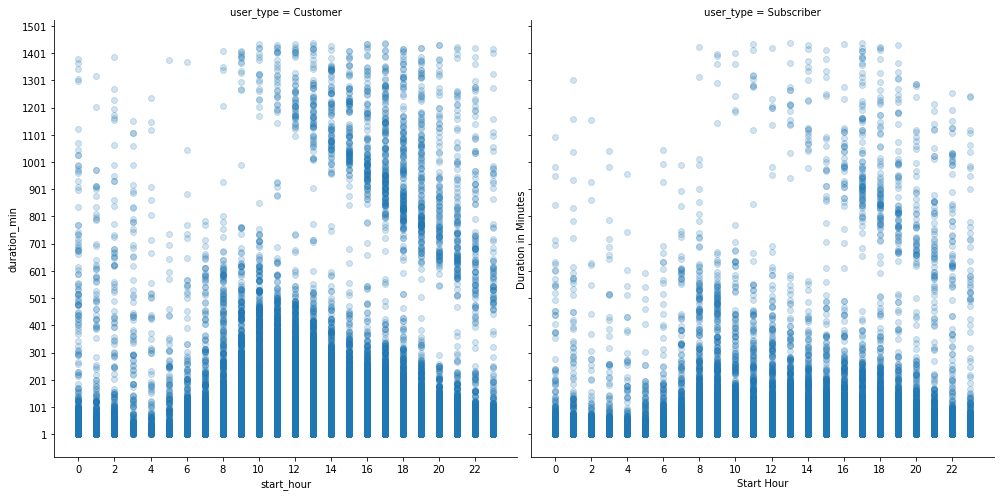

In [86]:
g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 7)
g.map(plt.scatter, 'start_hour', 'duration_min', alpha = 1/5);
plt.xticks(np.arange(0 , 23 + 1, 2))
plt.yticks(np.arange(df_clean['duration_min'].min() , df_clean['duration_min'].max() + 100, 100))
plt.ylabel('Duration in Minutes')
plt.xlabel('Start Hour');

It seems that Customrs are more likely to take longer trips duration in allmost all the times of the day.

### 3.2 Trip Duration vs. Start Hour based on Bike Share for All Status

C:\Users\ftoom\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


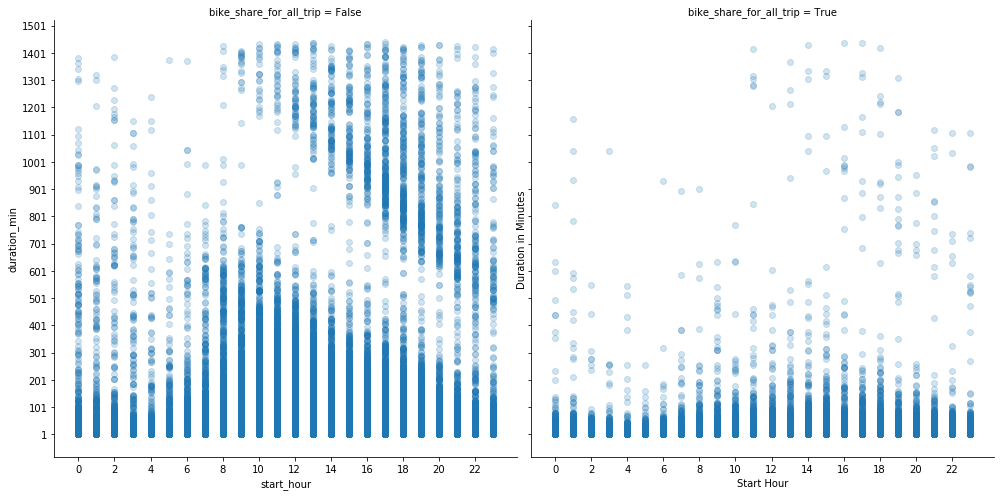

In [85]:
g = sb.FacetGrid(data = df_clean, col = 'bike_share_for_all_trip', size = 7)
g.map(plt.scatter, 'start_hour', 'duration_min', alpha = 1/5);
plt.xticks(np.arange(0 , 23 + 1, 2))
plt.yticks(np.arange(df_clean['duration_min'].min() , df_clean['duration_min'].max() + 100, 100))
plt.ylabel('Duration in Minutes')
plt.xlabel('Start Hour');

None members of "bike share for all" trip option seems to take longer trip duration than those who are members.

### 3.3 Start Weekday vs. Average Trips Durations based on the Time of Day

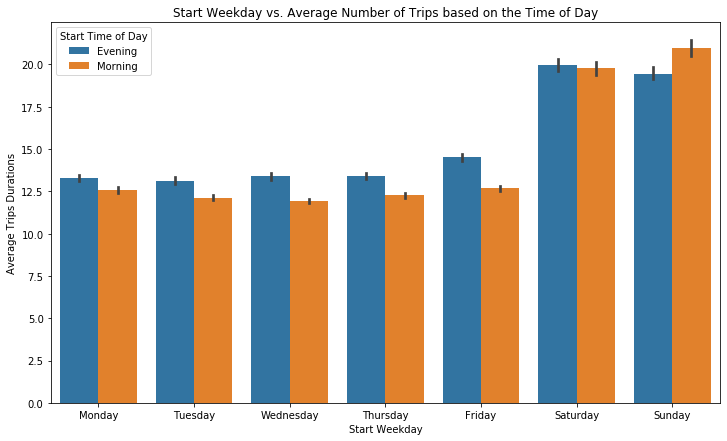

In [87]:
plt.figure(figsize = [12, 7])
ax = sb.barplot(data = df_clean, x = 'start_week_day', y = 'duration_min', hue = 'start_time_of_day')
plt.xticks(np.arange(7) , calendar.day_name[0:8])
plt.xlabel('Start Weekday')
plt.ylabel('Average Trips Durations')
plt.title('Start Weekday vs. Average Number of Trips based on the Time of Day')
ax.legend(title = 'Start Time of Day');

Trips made in the evenings tend to be longer on avergae than the ones made in the mornings in almost all days of the week exept for Sundays.

### 3.4 Start Weekday vs. Average Trips Durations based on the  User Type

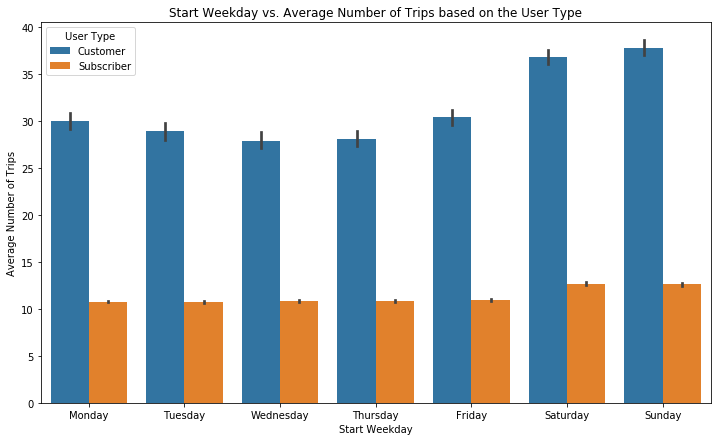

In [78]:
plt.figure(figsize = [12, 7])
ax = sb.barplot(data = df_clean, x = 'start_week_day', y = 'duration_min', hue = 'user_type')
plt.xticks(np.arange(7) , calendar.day_name[0:8])
plt.xlabel('Start Weekday')
plt.ylabel('Average Trips Durations')
plt.title('Start Weekday vs. Average Number of Trips based on the User Type')
ax.legend(title = 'User Type');

Trips made by Customers tend to be longer on avergae than the ones made by subscribers in almost all days of the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- It seems that Customrs are more likely to take longer trips duration in allmost all the times of the day.
- None members of "bike share for all" trip option seems to take longer trip duration than those who are members.
- Trips made in the evenings tend to be longer on avergae than the ones made in the mornings in almost all days of the week exept for Sundays.
- Trips made by Customers tend to be longer on avergae than the ones made by subscribers in almost all days of the week.


### Were there any interesting or surprising interactions between features?

No there are none.

## References

1. https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/
2. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html
3. https://docs.python.org/3/library/calendar.html
4. https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
5. https://stackoverflow.com/questions/56288949/how-to-access-the-last-element-in-a-pandas-series
6. http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php#:~:text=To%20add%20percentages%20to%20each,percentage%20to%20the%20tenth%20place.
7. https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/
8. https://seaborn.pydata.org/generated/seaborn.FacetGrid.html